In [1]:
import math
def AMS(s, b):
    return round(math.sqrt(2*((s+b)*math.log(1+s/b)-s)),3)
def percentage(a,b): return round(abs((a-b)*100/(a+b)),3)

In [91]:
!ls ../results/2018/makeSimple_DF

output_test_data.coffea     output_test_ewk.coffea     output_test_st.coffea
output_test_diboson.coffea  output_test_higgs.coffea   output_test_tt.coffea
output_test_dy.coffea	    output_test_signal.coffea  output_test_wjets.coffea


In [171]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP']#, '2017', '2016postVFP','2018']
var_dict = [{}, {}, {}]
df = []
for year in years:
    print(f'Processing {year}')
    for subsample in ['signal']:
    #for subsample in ['signal','diboson','tt','st','dy','wjets','higgs','ewk']: #'data',
        result = load(f"../results/{year}/makeDF/output_testv9_{subsample}.coffea")
        if isinstance(result,tuple):
            result = result[0]
        for varName in result:
            for i in range(3):
                if f'{i}jets' in varName:
                    if varName.replace(f'_{i}jets','') in var_dict[i]:
                        var_dict[i][varName.replace(f'_{i}jets','')] = np.append(var_dict[i][varName.replace(f'_{i}jets','')],result[varName].value)
                    else:
                        var_dict[i][varName.replace(f'_{i}jets','')] = result[varName].value
for i in range(3):
    df.append(pd.DataFrame(var_dict[i]))
data_cuts_os = pd.concat([df[i] for i in range(3)], axis=0, ignore_index=True)

Processing 2016preVFP


In [187]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP']#, '2017', '2016postVFP','2018']
var_dict = {}
for year in years:
    print(f'Processing {year}')
    for subsample in ['signal']:
    #for subsample in ['signal','diboson','tt','st','dy','wjets','higgs','ewk']: #'data',
        result = load(f"../results/{year}/makeDF/output_none.coffea")
        if isinstance(result,tuple):
            result = result[0]
        for varName in result:
            if varName in var_dict:
                var_dict[varName] = np.append(var_dict[varName],result[varName].value)
            else:
                var_dict[varName] = result[varName].value
data_cuts_os = pd.DataFrame(var_dict)

Processing 2016preVFP


In [189]:
data_cuts_os_gg = data_cuts_os[data_cuts_os.opp_charge.eq(1) & (data_cuts_os['sample']==1)]
data_cuts_os_vbf = data_cuts_os[data_cuts_os.opp_charge.eq(1) & (data_cuts_os['sample']==2)]

In [190]:
data_cuts_os_gg[['j1_j2_mass', 'DeltaEta_j1_j2', 'njets', 'j1pt']]

,j1_j2_mass,DeltaEta_j1_j2,njets,j1pt
0,0.000000,2.421470e-02,1.0,39.527584
1,0.000000,4.569214e-41,0.0,0.000000
2,0.000000,-1.464779e-27,1.0,39.607338
3,149.938736,9.750977e-01,2.0,148.520050
4,0.000000,-1.464779e-27,0.0,0.000000
...,...,...,...,...
1148,864.607361,5.263428e+00,3.0,85.787071
1149,0.000000,NaN,1.0,255.501068
1150,0.000000,NaN,1.0,76.808105
1151,0.000000,NaN,1.0,34.593216


In [161]:
data_cuts_os_gg['j1_j2_mass'][0] == np.nan

False

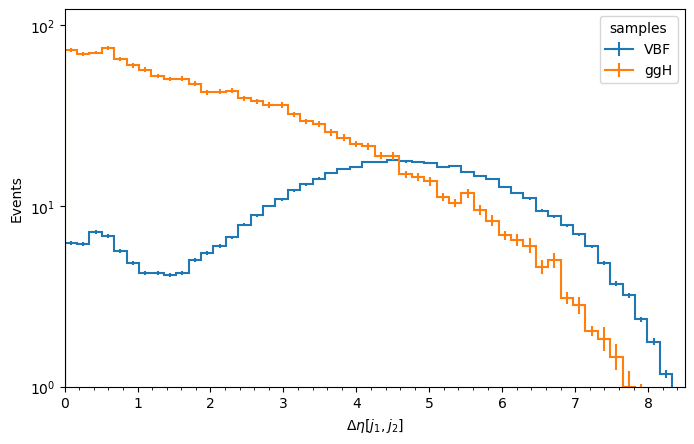

In [103]:
from coffea import hist
h = hist.Hist("Events", hist.Cat("dataset", "samples"), hist.Bin('DeltaEta_j1_j2', '$\Delta \eta[j_{1}, j_{2}]$', 50, 0, 8.5))
h.fill(dataset = 'ggH', DeltaEta_j1_j2 = data_cuts_os_gg.DeltaEta_j1_j2.to_numpy(), weight=data_cuts_os_gg.weight.to_numpy())
h.fill(dataset = 'VBF', DeltaEta_j1_j2 = data_cuts_os_vbf.DeltaEta_j1_j2.to_numpy(), weight=data_cuts_os_vbf.weight.to_numpy())
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=100)
ax = hist.plot1d(h)
ax.set_yscale('log')
ax.set_ylim(1, max(h.sum("dataset").values()[()])*1.5)
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)

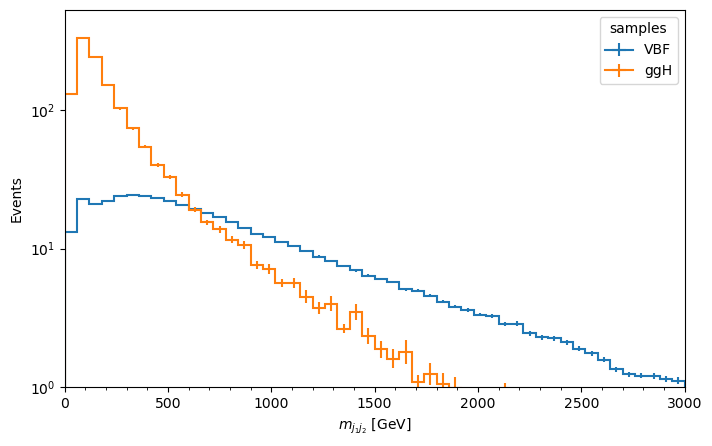

In [130]:
from coffea import hist
h = hist.Hist("Events", hist.Cat("dataset", "samples"), hist.Bin('j1_j2_mass', '$m_{j_{1}j_{2}}$ [GeV]', 50, 0, 3000))
h.fill(dataset = 'ggH', j1_j2_mass = data_cuts_os_gg.j1_j2_mass.to_numpy(), weight=data_cuts_os_gg.weight.to_numpy())
h.fill(dataset = 'VBF', j1_j2_mass = data_cuts_os_vbf.j1_j2_mass.to_numpy(), weight=data_cuts_os_vbf.weight.to_numpy())
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=100)
ax = hist.plot1d(h)
ax.set_yscale('log')
ax.set_ylim(1, max(h.sum("dataset").values()[()])*1.5)
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)

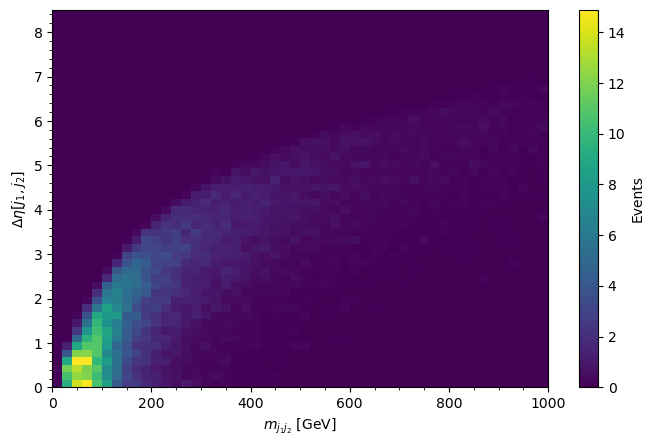

In [131]:
from coffea import hist
h = hist.Hist("Events", hist.Cat("dataset", "samples"), hist.Bin('DeltaEta_j1_j2', '$\Delta \eta[j_{1}, j_{2}]$', 50, 0, 8.5), hist.Bin('j1_j2_mass', '$m_{j_{1}j_{2}}$ [GeV]', 50, 0, 1000))
h.fill(dataset = 'ggH', DeltaEta_j1_j2 = data_cuts_os_gg.DeltaEta_j1_j2.to_numpy(), j1_j2_mass = data_cuts_os_gg.j1_j2_mass.to_numpy(), weight=data_cuts_os_gg.weight.to_numpy())
#h.fill(dataset = 'VBF', DeltaEta_j1_j2 = data_cuts_os_vbf.DeltaEta_j1_j2.to_numpy(), j1_j2_mass = data_cuts_os_vbf.j1_j2_mass.to_numpy(), weight=data_cuts_os_vbf.weight.to_numpy())
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
hist.plot2d(h.integrate('dataset'), xaxis='j1_j2_mass', ax=ax)
ax.minorticks_on()

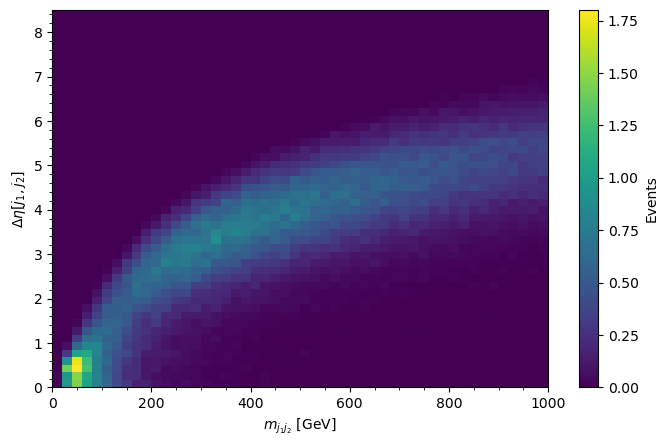

In [132]:
from coffea import hist
h = hist.Hist("Events", hist.Cat("dataset", "samples"), hist.Bin('DeltaEta_j1_j2', '$\Delta \eta[j_{1}, j_{2}]$', 50, 0, 8.5), hist.Bin('j1_j2_mass', '$m_{j_{1}j_{2}}$ [GeV]', 50, 0, 1000))
#h.fill(dataset = 'ggH', DeltaEta_j1_j2 = data_cuts_os_gg.DeltaEta_j1_j2.to_numpy(), j1_j2_mass = data_cuts_os_gg.j1_j2_mass.to_numpy(), weight=data_cuts_os_gg.weight.to_numpy())
h.fill(dataset = 'VBF', DeltaEta_j1_j2 = data_cuts_os_vbf.DeltaEta_j1_j2.to_numpy(), j1_j2_mass = data_cuts_os_vbf.j1_j2_mass.to_numpy(), weight=data_cuts_os_vbf.weight.to_numpy())
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
hist.plot2d(h.integrate('dataset'), xaxis='j1_j2_mass', ax=ax)
ax.minorticks_on()

In [49]:
bkg = ['data', 'GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'TTTo2L2Nu', 'ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5', 'DYJetsToLL_M-50', 'DYJetsToLL_M-10to50', 'WGToLNuG_TuneCP5', 'TTToSemiLeptonic', 'TTToHadronic', 'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 'ST_t-channel_antitop_4f_InclusiveDecays', 'ST_t-channel_top_4f_InclusiveDecays', 'EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets', 'GluGluHToTauTau', 'VBFHToTauTau', 'WminusHToTauTau', 'WplusHToTauTau', 'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau', 'WJetsToLNu_TuneCP5']
print([bkg.index(i) for i in bkg if 'HToTauTau' in i])
print([bkg.index(i) for i in bkg if 'HToWW' in i])
subsubsub = data_cuts_os[data_cuts_os.e_m_Mass.gt(110) & data_cuts_os.e_m_Mass.lt(160)  & data_cuts_os.mtrigger.lt(1) & data_cuts_os.ept.gt(24)].weight.sum()

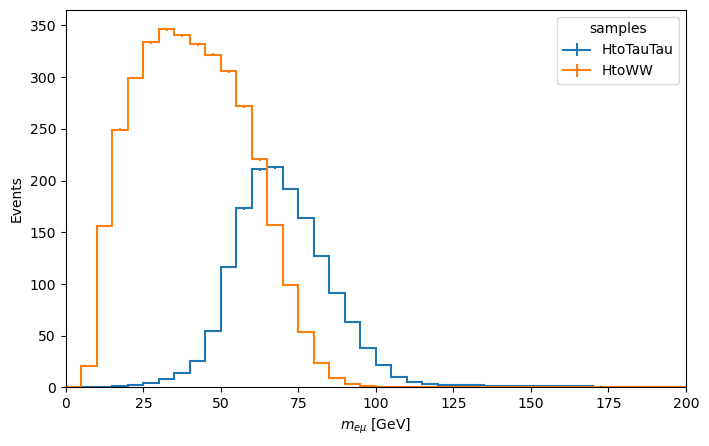

In [57]:
from coffea import hist
h = hist.Hist("Events", hist.Cat("dataset", "samples"), hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 40, 0, 200))
h.fill(dataset = 'HtoTauTau (GG)', e_m_Mass = data_cuts_os[data_cuts_os['sample'].isin([20, 21, 22, 23, 26])].e_m_Mass.to_numpy(), weight=data_cuts_os[data_cuts_os['sample'].isin([20, 21, 22, 23, 26])].weight.to_numpy())
h.fill(dataset = 'HtoWW', e_m_Mass = data_cuts_os[data_cuts_os['sample'].isin([24,25])].e_m_Mass.to_numpy(), weight=data_cuts_os[data_cuts_os['sample'].isin([24,25])].weight.to_numpy())
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=100)
a = hist.plot1d(h)

In [20]:
data_cuts_os[data_cuts_os.mtrigger.eq(1)]['sample'].describe()

count    701140.000000
mean         24.162597
std           1.393341
min          20.000000
25%          24.000000
50%          25.000000
75%          25.000000
max          26.000000
Name: sample, dtype: float64

In [11]:
data_cuts_os[data_cuts_os.mtrigger.eq(1)].weight.sum()

1777.229677707188

In [9]:
data_cuts_os[data_cuts_os.mtrigger.eq(1)].weight.sum()

3.610694918431994

In [116]:
samples = ['data', 'GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'TTTo2L2Nu', 'ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5', 'DYJetsToLL_M-50', 'DYJetsToLL_M-10to50', 'WGToLNuG_TuneCP5', 'TTToSemiLeptonic', 'TTToHadronic', 'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 'ST_t-channel_antitop_4f_InclusiveDecays', 'ST_t-channel_top_4f_InclusiveDecays', 'EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets', 'GluGluHToTauTau', 'VBFHToTauTau', 'WminusHToTauTau', 'WplusHToTauTau', 'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau', 'WJetsToLNu_TuneCP5']
[samples.index(i) for i in samples if 'TT' in i]
data_cuts_os.loc[((data_cuts_os['sample']==3) | (data_cuts_os['sample']==10) | (data_cuts_os['sample']==11)), ['weight']] *= 1.0711607711238926

In [117]:
data_m = data_cuts_os[data_cuts_os.mtrigger.eq(1)]
for pt in range(20,31):
    bkg = data_m[data_m.ept.gt(pt) & data_m.label.eq(0)]['weight'].sum()
    sig = data_m[data_m.ept.gt(pt) & data_m.label.eq(1)]['weight'].sum()
    print(pt, AMS(sig*0.0059, bkg), round(sig*0.0059), round(bkg))

20 0.959 138 20715
21 0.96 138 20581
22 0.961 138 20429
23 0.962 137 20266
24 0.963 137 20101
25 0.964 136 19931
26 0.964 136 19749
27 0.965 135 19557
28 0.965 134 19350
29 0.965 134 19129
30 0.966 133 18884


In [107]:
data_em = data_cuts_os[(data_cuts_os.etrigger.eq(1) & data_cuts_os.mpt.gt(15))|(data_cuts_os.mtrigger.eq(1) & data_cuts_os.ept.gt(24))]
data_m = data_cuts_os[data_cuts_os.mtrigger.eq(1) & data_cuts_os.ept.gt(24)]
totalbkg_m, totalbkg_em = data_m[data_m.label.eq(0)]['weight'].sum(), data_em[data_em.label.eq(0)]['weight'].sum()
totalsig_m, totalsig_em = data_m[data_m.label.eq(1)]['weight'].sum(), data_em[data_em.label.eq(1)]['weight'].sum()
print('bkg', totalbkg_m, totalbkg_em, percentage(totalbkg_m, totalbkg_em))
print('sig', totalsig_m*0.0059, totalsig_em*0.0059, percentage(totalsig_m, totalsig_em))
print('m', AMS(totalsig_m*0.0059, totalbkg_m))
print('em', AMS(totalsig_em*0.0059, totalbkg_em))
print(percentage(AMS(totalsig_m*0.0059, totalbkg_m), AMS(totalsig_em*0.0059, totalbkg_em)))

bkg 20100.653502799418 23454.67450137778 7.701
sig 136.68773354052857 149.74823727980936 4.56
m 0.963
em 0.977
0.722
